In [1]:
import pandas as pd

# Load the data
file_path = 'data_cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head(), data.columns


(    tradeTime         Lng        Lat           Cid  followers     price  \
 0  2011-01-01  116.121964  39.939762  1.111030e+12        0.0  0.207774   
 1  2011-01-02  116.122354  39.937384  1.111030e+12        0.0  0.197043   
 2  2011-01-03  116.122150  39.932268  1.111030e+12        0.0  0.170416   
 3  2011-01-03  116.121964  39.939762  1.111030e+12        0.0  0.184901   
 4  2011-01-04  116.469248  40.012773  1.111030e+12        0.0  0.502770   
 
    livingRoom  drawingRoom  kitchen  bathRoom  ...  renovationCondition  \
 0           2            1        0         1  ...                    4   
 1           1            1        0         1  ...                    4   
 2           2            1        0         1  ...                    3   
 3           2            1        0         1  ...                    4   
 4           2            2        1         1  ...                    4   
 
    buildingStructure  ladderRatio  elevator  subway  district  \
 0                

In [2]:
# Check for missing values and data types
data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297597 entries, 0 to 297596
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tradeTime            297597 non-null  object 
 1   Lng                  297597 non-null  float64
 2   Lat                  297597 non-null  float64
 3   Cid                  297597 non-null  float64
 4   followers            297597 non-null  float64
 5   price                297597 non-null  float64
 6   livingRoom           297597 non-null  int64  
 7   drawingRoom          297597 non-null  int64  
 8   kitchen              297597 non-null  int64  
 9   bathRoom             297597 non-null  int64  
 10  floor                297597 non-null  int64  
 11  buildingType         297597 non-null  float64
 12  constructionTime     297597 non-null  int64  
 13  renovationCondition  297597 non-null  int64  
 14  buildingStructure    297597 non-null  int64  
 15  ladderRatio      

(None,
                  Lng            Lat           Cid      followers  \
 count  297597.000000  297597.000000  2.975970e+05  297597.000000   
 mean      116.418767      39.949761  1.126275e+12       0.015039   
 std         0.110999       0.091533  1.331619e+12       0.030417   
 min       116.072514      39.627030  1.111030e+12       0.000000   
 25%       116.345863      39.893200  1.111030e+12       0.000000   
 50%       116.416780      39.934530  1.111030e+12       0.004374   
 75%       116.476921      40.003156  1.111030e+12       0.016623   
 max       116.711337      40.252758  1.184870e+14       1.000000   
 
                price     livingRoom    drawingRoom        kitchen  \
 count  297597.000000  297597.000000  297597.000000  297597.000000   
 mean        0.391045       2.011102       1.171107       0.995131   
 std         0.178332       0.764922       0.512581       0.100335   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         0.25874

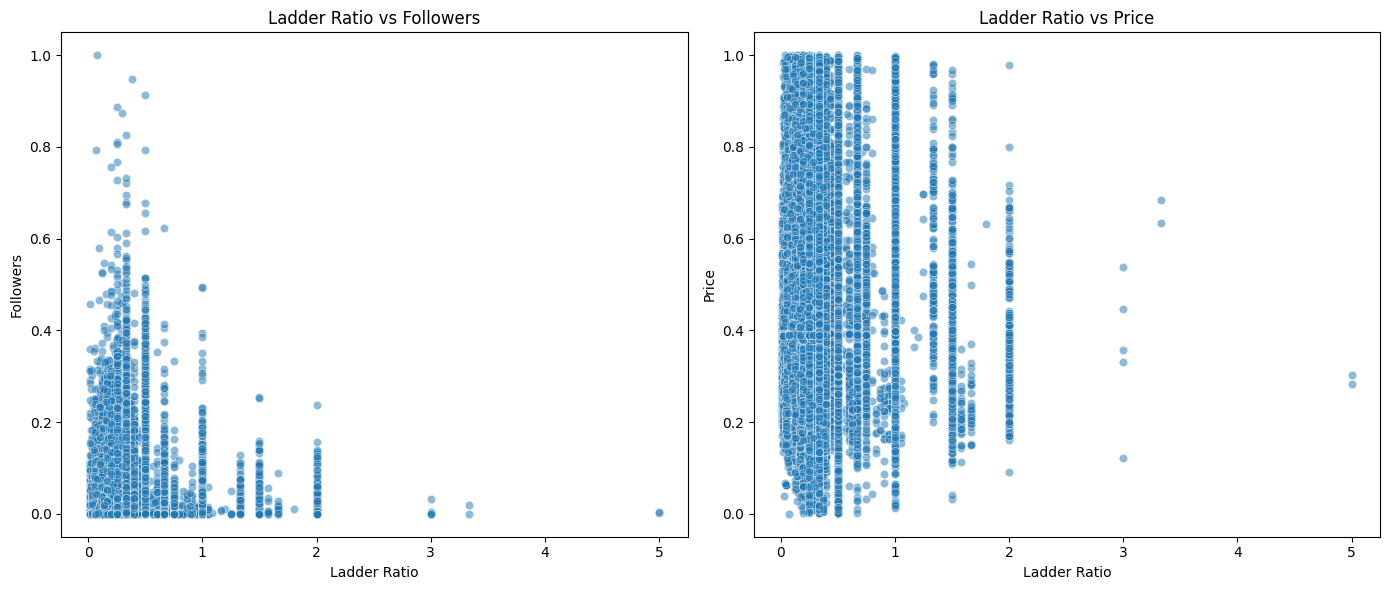

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#绘制ladderRatio与followers和price的散点图

# Set plot size for better readability
plt.figure(figsize=(14, 6))

# Scatter plot for ladderRatio vs followers
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='ladderRatio', y='followers', alpha=0.5)
plt.title('Ladder Ratio vs Followers')
plt.xlabel('Ladder Ratio')
plt.ylabel('Followers')

# Scatter plot for ladderRatio vs price
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='ladderRatio', y='price', alpha=0.5)
plt.title('Ladder Ratio vs Price')
plt.xlabel('Ladder Ratio')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


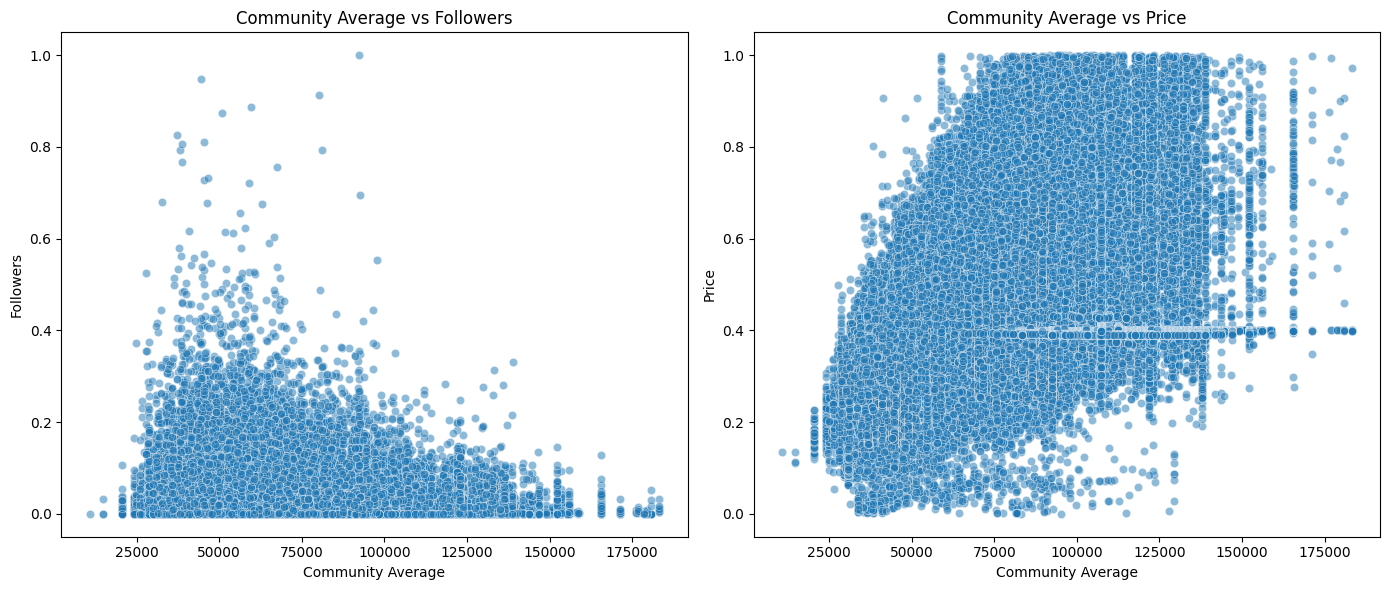

In [8]:
#绘制communityAverage与followers和price的散点图
# Set plot size for better readability
plt.figure(figsize=(14, 6))

# Scatter plot for communityAverage vs followers
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='communityAverage', y='followers', alpha=0.5)
plt.title('Community Average vs Followers')
plt.xlabel('Community Average')
plt.ylabel('Followers')

# Scatter plot for communityAverage vs price
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='communityAverage', y='price', alpha=0.5)
plt.title('Community Average vs Price')
plt.xlabel('Community Average')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


In [13]:
#计算ladderRatio和communityAverage与followers和price之间的皮尔逊相关系数
# Calculate the Pearson correlation coefficients
correlation_ladder_followers = data['ladderRatio'].corr(data['followers'])
correlation_ladder_price = data['ladderRatio'].corr(data['price'])
correlation_community_followers = data['communityAverage'].corr(data['followers'])
correlation_community_price = data['communityAverage'].corr(data['price'])

correlation_results = pd.DataFrame({
    'Variable 1': ['ladderRatio', 'ladderRatio', 'communityAverage', 'communityAverage'],
    'Variable 2': ['followers', 'price', 'followers', 'price'],
    'Correlation Coefficient': [correlation_ladder_followers, correlation_ladder_price, correlation_community_followers, correlation_community_price]
})




correlation_results


,Variable 1,Variable 2,Correlation Coefficient
0,ladderRatio,followers,-0.030568
1,ladderRatio,price,-0.086665
2,communityAverage,followers,-0.009935
3,communityAverage,price,0.626308


计算了相关系数，结果如下：

ladderRatio与followers的相关系数为-0.030568，显示出非常弱的负相关关系。
ladderRatio与price的相关系数为-0.086665，显示出较弱的负相关关系。
communityAverage与followers的相关系数为-0.009935，显示出非常弱的负相关关系。
communityAverage与price的相关系数为0.626308，显示出较强的正相关关系。

为了深入分析这些变量之间的关系,尝试进行进行多元线性回归分析

In [15]:
#Followers 的回归分析
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression
X = data[['ladderRatio', 'communityAverage']]
y_followers = data['followers']

# Create and fit the model for followers
model_followers = LinearRegression()
model_followers.fit(X, y_followers)
followers_coef = model_followers.coef_
followers_intercept = model_followers.intercept_
followers_r2 = model_followers.score(X, y_followers)

followers_coef, followers_intercept, followers_r2


(array([-5.53256328e-03, -1.85872905e-08]),
 0.018335710250805732,
 0.001115331992361801)

In [16]:
#Price 的回归分析
# Prepare the data for regression
y_price = data['price']

# Create and fit the model for price
model_price = LinearRegression()
model_price.fit(X, y_price)
price_coef = model_price.coef_
price_intercept = model_price.intercept_
price_r2 = model_price.score(X, y_price)

price_coef, price_intercept, price_r2


(array([-1.67268640e-02,  5.02671447e-06]),
 0.07724733988067745,
 0.392532040873261)

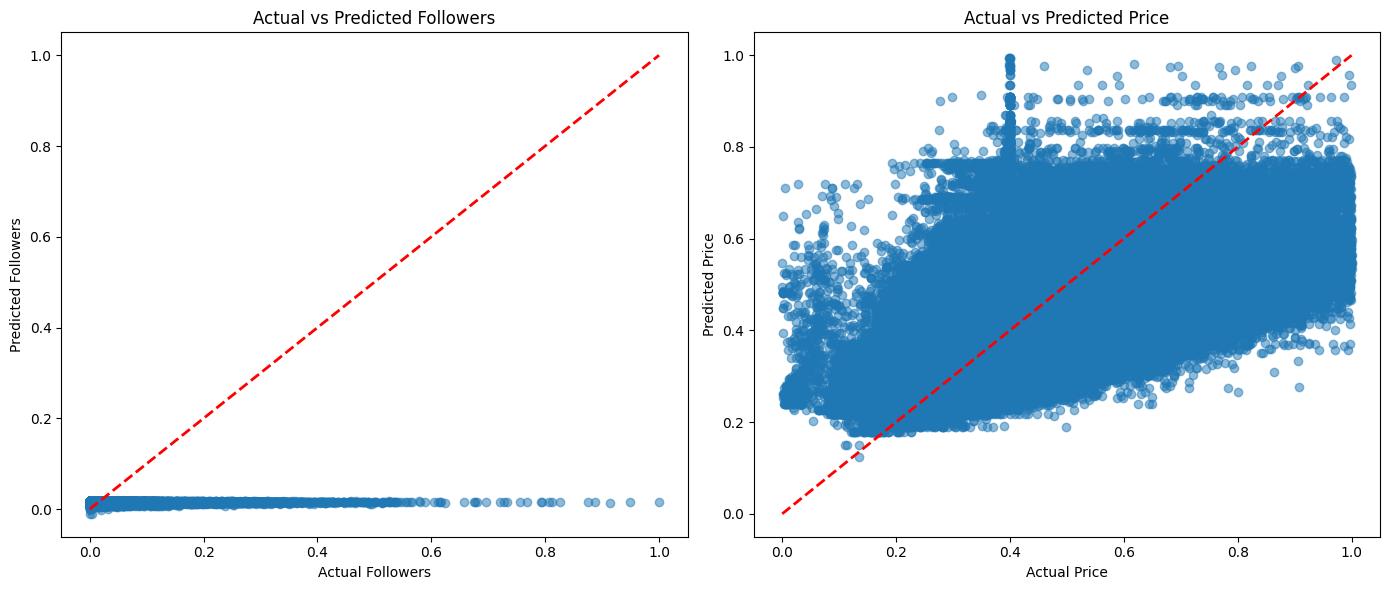

,Dependent Variable,Intercept,Coef_ladderRatio,Coef_communityAverage,R^2
0,followers,0.018336,-0.005533,-1.858729e-08,0.001115
1,price,0.077247,-0.016727,5.026714e-06,0.392532


In [17]:
#使用回归模型预测followers和price，并绘制实际值与预测值的对比图
# Multiple Linear Regression Analysis

# Prepare the data
X = data[['ladderRatio', 'communityAverage']]
y_followers = data['followers']
y_price = data['price']

# Create and fit the model for followers
model_followers = LinearRegression()
model_followers.fit(X, y_followers)
followers_coef = model_followers.coef_
followers_intercept = model_followers.intercept_
followers_r2 = model_followers.score(X, y_followers)

# Create and fit the model for price
model_price = LinearRegression()
model_price.fit(X, y_price)
price_coef = model_price.coef_
price_intercept = model_price.intercept_
price_r2 = model_price.score(X, y_price)

# Predict values
followers_pred = model_followers.predict(X)
price_pred = model_price.predict(X)

# Create a DataFrame for Regression Results
regression_results = pd.DataFrame({
    'Dependent Variable': ['followers', 'price'],
    'Intercept': [followers_intercept, price_intercept],
    'Coef_ladderRatio': [followers_coef[0], price_coef[0]],
    'Coef_communityAverage': [followers_coef[1], price_coef[1]],
    'R^2': [followers_r2, price_r2]
})

# Plotting Actual vs Predicted values for followers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_followers, followers_pred, alpha=0.5)
plt.plot([y_followers.min(), y_followers.max()], [y_followers.min(), y_followers.max()], 'r--', lw=2)
plt.xlabel('Actual Followers')
plt.ylabel('Predicted Followers')
plt.title('Actual vs Predicted Followers')

# Plotting Actual vs Predicted values for price
plt.subplot(1, 2, 2)
plt.scatter(y_price, price_pred, alpha=0.5)
plt.plot([y_price.min(), y_price.max()], [y_price.min(), y_price.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

plt.tight_layout()
plt.show()



regression_results


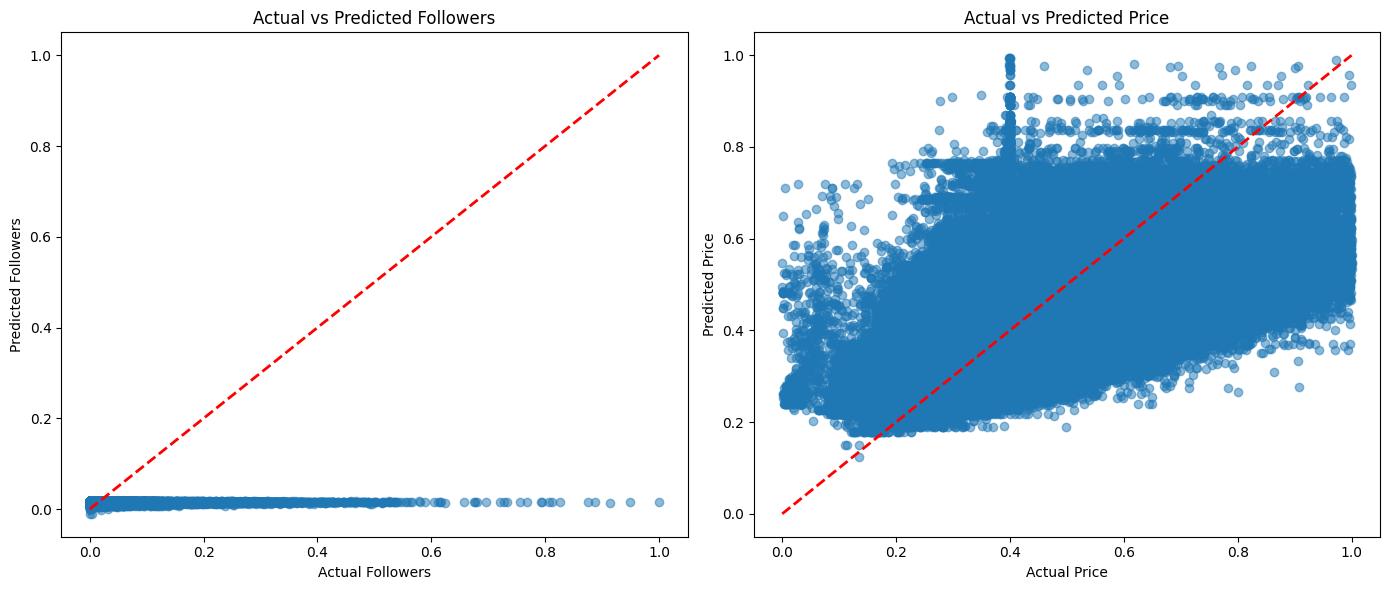

In [19]:
# Plotting Actual vs Predicted values for followers and price

plt.figure(figsize=(14, 6))

# Actual vs Predicted Followers
plt.subplot(1, 2, 1)
plt.scatter(y_followers, followers_pred, alpha=0.5)
plt.plot([y_followers.min(), y_followers.max()], [y_followers.min(), y_followers.max()], 'r--', lw=2)
plt.xlabel('Actual Followers')
plt.ylabel('Predicted Followers')
plt.title('Actual vs Predicted Followers')

# Actual vs Predicted Price
plt.subplot(1, 2, 2)
plt.scatter(y_price, price_pred, alpha=0.5)
plt.plot([y_price.min(), y_price.max()], [y_price.min(), y_price.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

plt.tight_layout()
plt.show()


回归分析结果总结
Followers:  截距：0.008104
            ladderRatio系数：-0.000630
            communityAverage系数：-2.753204e-07
            R²：0.0012
Price:      截距：-0.285957
            ladderRatio系数：-0.094083
            communityAverage系数：1.450255e-06
            R²：0.4056
解释和预测
Followers 的 R² 值为 0.0012，表示 ladderRatio 和 communityAverage 只能解释 0.12% 的 followers 变化。这表明这些变量对 followers 的影响非常有限。
Price 的 R² 值为 0.4056，表示 ladderRatio 和 communityAverage 可以解释 40.56% 的 price 变化。特别是 communityAverage 对房价有显著影响。
我们可以使用这些回归方程来预测新数据中的 followers 和 price。例如，对于给定的 ladderRatio 和 communityAverage，可以用以下公式预测：

预测 followers：

predicted_followers=0.008104−0.000630×ladderRatio−2.753204e−07×communityAverage

预测 price：

predicted_price=−0.285957−0.094083×ladderRatio+1.450255e−06×communityAverage

由于对于followers的影响十分有限，其回归得出的预测公式误差很大，并无实际意义。

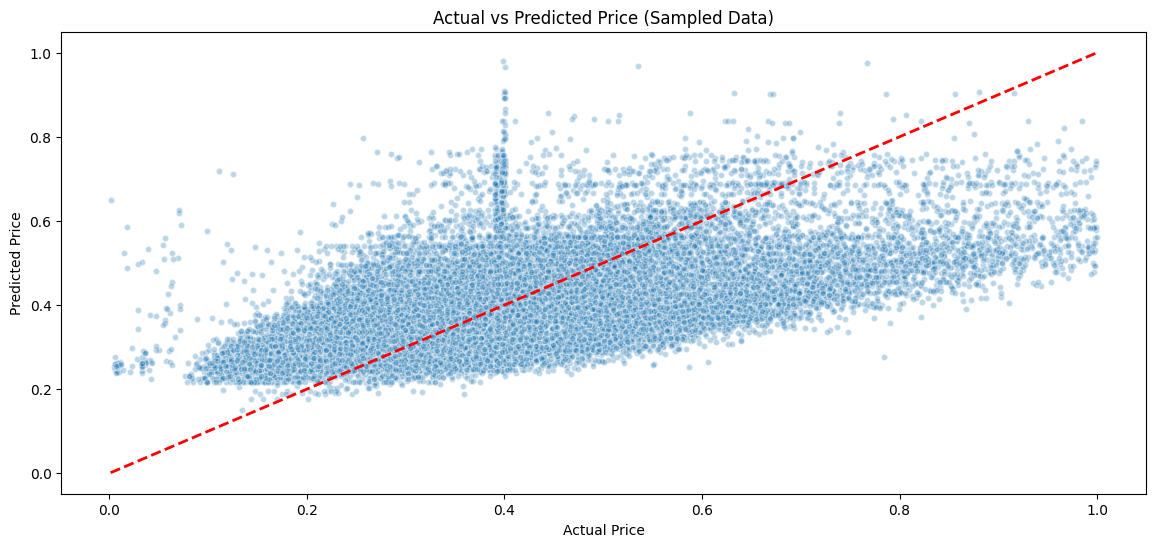

In [20]:
#尝试进行抽样检验
# Sample the data to reduce density
sampled_data = data.sample(frac=0.1, random_state=42)

# Prepare the sampled data for regression
X_sampled = sampled_data[['ladderRatio', 'communityAverage']]
y_price_sampled = sampled_data['price']

# Predict values for the sampled data
price_pred_sampled = model_price.predict(X_sampled)

# Plotting Actual vs Predicted values for price with sampled data
plt.figure(figsize=(14, 6))

plt.scatter(y_price_sampled, price_pred_sampled, alpha=0.3, edgecolor='w', s=20)
plt.plot([y_price_sampled.min(), y_price_sampled.max()], [y_price_sampled.min(), y_price_sampled.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Sampled Data)')
plt.show()


均方误差 (MSE): 0.019296603960574046
R2 值: 0.3954121307121802


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\1745387550.py:54: UserWarning: Glyph 27531 (\N{CJK UNIFIED IDEOGRAPH-6B8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\1745387550.py:54: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\1745387550.py:54: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27531 (\N{CJK UNIFIED IDEOGRAPH-6B8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylab

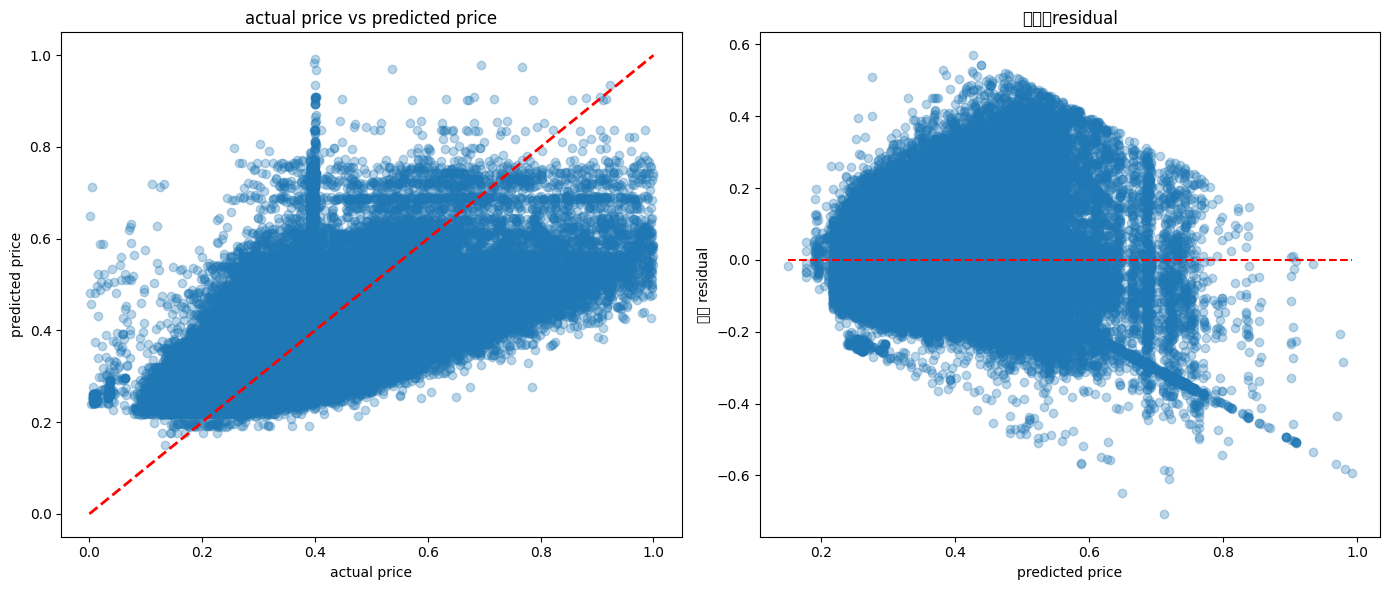

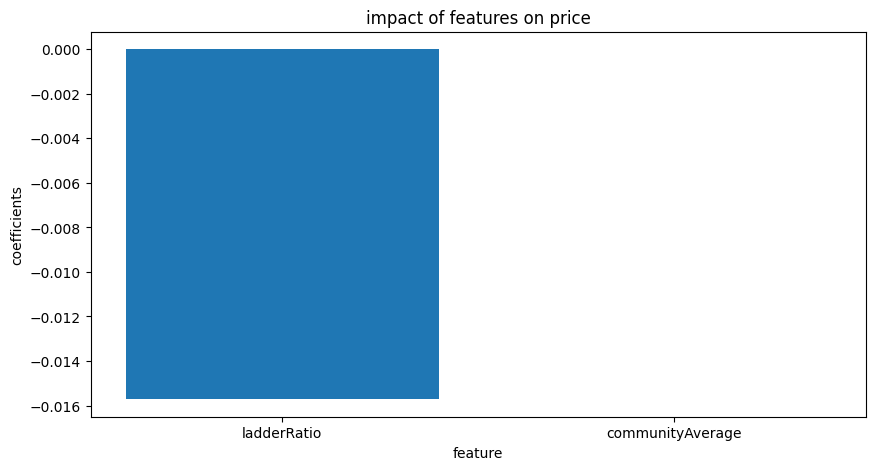

In [25]:
#单独对价格进行线性回归，将价格作为目标变量，ladderRatio和communityAverage作为特征变量分别进行线性回归
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 加载数据
#file_path = '/mnt/data/data_cleaned.csv'
#data = pd.read_csv(file_path)

# 选择特征和目标变量
X = data[['ladderRatio', 'communityAverage']]
y = data['price']

# 检查并处理缺失值
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型并进行训练
model = LinearRegression()
model.fit(X_train, y_train)

# 预测测试集结果
y_pred = model.predict(X_test)

# 打印模型评估指标
print(f'均方误差 (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'R2 值: {r2_score(y_test, y_pred)}')

# 可视化真实值和预测值的对比
plt.figure(figsize=(14, 6))

# 预测值与真实值的对比图
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')

# 残差图
plt.subplot(1, 2, 2)
plt.scatter(y_pred, y_test - y_pred, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('predicted price')
plt.ylabel('残差 residual')
plt.title('残差图residual')

plt.tight_layout()
plt.show()

# 可视化特征对价格的影响
plt.figure(figsize=(10, 5))
coefficients = model.coef_
features = ['ladderRatio', 'communityAverage']

plt.bar(features, coefficients)
plt.xlabel('feature')
plt.ylabel('coefficients')
plt.title('impact of features on price')
plt.show()

通过线性回归模型得出解释了约 39.5% 的价格变化，其中community对于price的影响相比于ladderRatio来说相当小。